In [101]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [102]:
#Import all the data files.

mouse_data_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [103]:
#Read the files.

mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [104]:
# Combine the data into a single dataset.

combined_data = pd.merge(mouse_data, study_results, on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [105]:
#Count "Mouse ID".

mouse_check = combined_data["Mouse ID"].count()
mouse_check

1893

In [106]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_mouse = combined_data.drop_duplicates({"Mouse ID","Timepoint"})
drop_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [108]:
# Checking the number of mice in the clean DataFrame.

mouse_check2 = drop_mouse["Mouse ID"].count()
mouse_check2

1888

In [109]:
#Grouped "Drug Regimen" and "Tumor Volumes (mm3)" for finding mean/median/variance/standard deviation/SEM.

drug = drop_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

In [110]:
#find mean of Drug Regimen and Tumor Volume(mm3).
drug_mean = drug.mean()

In [111]:
#find median of Drug Regimen and Tumor Volume(mm3).
drug_median = drug.median()

In [112]:
#find variance of Drug Regimen and Tumor Volume(mm3).
drug_var = drug.var()

In [113]:
#find Standard Deviation of Drug Regimen and Tumor Volume(mm3).
drug_std = drug.std()

In [114]:
#find SEM Drug Regimen and Tumor Volume(mm3).
drug_sem = drug.sem()

In [115]:
# Assemble the resulting series into a single summary dataframe.

sum_drug = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, 
                         "Varian": drug_var, "STD": drug_std, "SEM": drug_sem})
sum_drug

,Mean,Median,Varian,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [116]:
#Create DataFrame for counting "Mouse ID" in each "Drug Regimen".

drug_mouse = pd.DataFrame(drop_mouse.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index())
drug_mouse

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


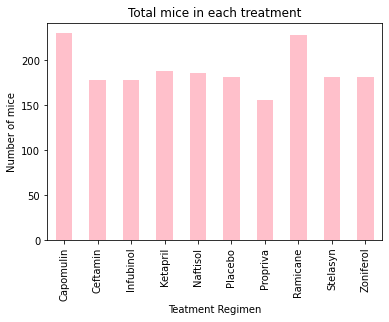

In [117]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drop_mouse.groupby(["Drug Regimen"])["Mouse ID"].count().plot(kind="bar", facecolor="Pink", align="center")
plt.title("Total mice in each treatment")
plt.ylabel("Number of mice")
plt.xlabel("Teatment Regimen")
plt.show()

In [118]:
#Create the "Drug Regimen" list.

drug_plot = sum_drug.index.tolist()
drug_plot

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [119]:
#Create the "Mouse ID" counted list.

mouse_plot = drop_mouse.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
mouse_plot

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

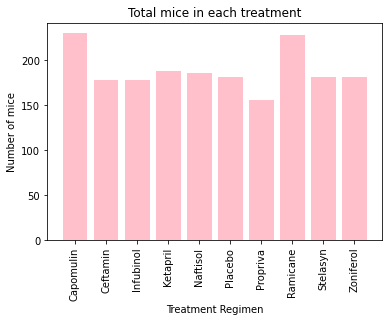

In [120]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(drug_plot))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.title("Total mice in each treatment")
plt.ylabel("Number of mice")
plt.xlabel("Treatment Regimen")

plt.bar(x_axis, mouse_plot, facecolor="Pink", align = "center")
plt.xticks(tick_locations, drug_plot, rotation=90)
plt.show()

In [121]:
#Count mice's gender.

drop_mouse.groupby(["Sex"])["Mouse ID"].count()

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

In [122]:
#Created DataFrame for mice's gender.

mouse_gender = pd.DataFrame(drop_mouse.groupby(["Sex"])["Mouse ID"].count())
mouse_gender

,Mouse ID
Sex,
Female,930
Male,958


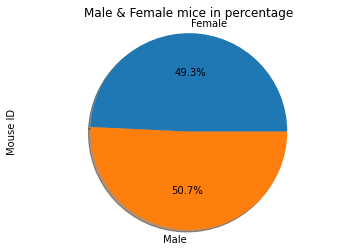

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drop_mouse.groupby(["Sex"])["Mouse ID"].count().plot(kind="pie", autopct="%1.1f%%", shadow = True)
plt.title("Male & Female mice in percentage")
plt.axis("equal")
plt.show()

In [124]:
#Create a list for mice's gender.

gender_plot = mouse_gender.index.tolist()
percentage_plot = drop_mouse.groupby(["Sex"])["Mouse ID"].count().tolist()
colors = ["SkyBlue","Orange"]

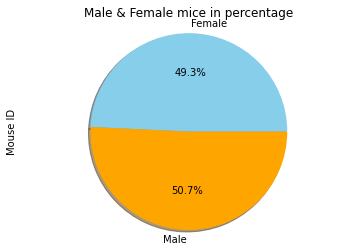

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Male & Female mice in percentage")
plt.pie(percentage_plot, labels=gender_plot, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.ylabel("Mouse ID")
plt.show()

In [152]:
#Sort columns "Drug Regimen","Mouse ID", "Timepoint".

sorted_ = drop_mouse.sort_values(["Drug Regimen","Mouse ID","Timepoint"], ascending = True)
sorted_

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [153]:
#Get the last (greatest) timepoint.

last_greatest = sorted_.loc[sorted_["Timepoint"] == 45]
last_greatest.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [154]:
# Calculate the final tumor volume of each mouse across Capomulin Regimen and merge it to get the tumor volume at the last timepoint.

cap_drug = last_greatest.loc[last_greatest["Drug Regimen"]=="Capomulin"]
tumor_cap = cap_drug["Tumor Volume (mm3)"]
tumor_cap.reset_index()

,index,Tumor Volume (mm3)
0,309,38.982878
1,299,38.939633
2,244,37.074024
3,360,40.159220
4,440,47.685963
5,204,37.311846
6,337,38.125164
7,380,41.483008
8,282,38.846876
9,39,28.430964


In [155]:
# Create quartile calculations.

quantile_cap = tumor_cap.quantile([0.25,0.5,0.75])
low_quartile_cap = quantile_cap[0.25]
high_quartile_cap = quantile_cap[0.75]
iqr_cap = high_quartile_cap - low_quartile_cap


print(low_quartile_cap)
print(high_quartile_cap)
print(iqr_cap)
print(quantile_cap[0.5])

lower_bound_cap = low_quartile_cap - (iqr_cap*1.5)
upper_bound_cap = high_quartile_cap + (iqr_cap*1.5)

print(lower_bound_cap)
print(upper_bound_cap)

32.37735684
40.1592203
7.781863460000004
37.31184577
20.70456164999999
51.83201549


In [156]:
#Create DataFrame to preview each of calculations.

cap_df = pd.DataFrame({"Capomulin 1st quartile": [low_quartile_cap], "Capomulin 3rd quartile": [high_quartile_cap], 
                       "IQR Capomulin": [iqr_cap], "Median": [quantile_cap[0.5]],"Capomulin Lower Bound": [lower_bound_cap],
                      "Capomulin Upper Bound": [upper_bound_cap]})
cap_df

,Capomulin 1st quartile,Capomulin 3rd quartile,IQR Capomulin,Median,Capomulin Lower Bound,Capomulin Upper Bound
0,32.377357,40.15922,7.781863,37.311846,20.704562,51.832015


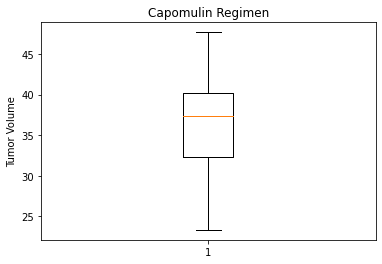

In [157]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin Regimen")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_cap)
plt.show()

In [158]:
# Calculate the final tumor volume of each mouse across Ramicane Regimen and merge it to get the tumor volume at the last timepoint.

ram_drug = last_greatest.loc[last_greatest["Drug Regimen"]=="Ramicane"]
tumor_ram = ram_drug["Tumor Volume (mm3)"]
tumor_ram.reset_index()

,index,Tumor Volume (mm3)
0,327,38.407618
1,430,43.047543
2,214,38.810366
3,174,32.978522
4,154,33.397653
5,272,37.311236
6,400,40.659006
7,49,29.128472
8,184,33.562402
9,254,36.374510


In [159]:
# Create quartile calculations.

quantile_ram = tumor_ram.quantile([0.25,0.5,0.75])
low_quartile_ram = quantile_ram[0.25]
high_quartile_ram = quantile_ram[0.75]
iqr_ram = high_quartile_ram - low_quartile_ram


print(low_quartile_ram)
print(high_quartile_ram)
print(iqr_ram)
print(quantile_ram[0.5])

lower_bound_ram = low_quartile_ram - (iqr_ram*1.5)
upper_bound_ram = high_quartile_ram + (iqr_ram*1.5)

print(lower_bound_ram)
print(upper_bound_ram)

30.981175225
38.5083053075
7.527130082500001
34.848627300000004
19.69048010125
49.79900043125001


In [160]:
#Create DataFrame to preview each of calculations.

ram_df = pd.DataFrame({"Ramicane 1st quartile": [low_quartile_ram], "Ramicane 3rd quartile": [high_quartile_ram], 
                       "IQR Ramicane": [iqr_ram], "Median": [quantile_ram[0.5]],"Ramicane Lower Bound": [lower_bound_ram],
                      "Ramicane Upper Bound": [upper_bound_ram]})
ram_df

,Ramicane 1st quartile,Ramicane 3rd quartile,IQR Ramicane,Median,Ramicane Lower Bound,Ramicane Upper Bound
0,30.981175,38.508305,7.52713,34.848627,19.69048,49.799


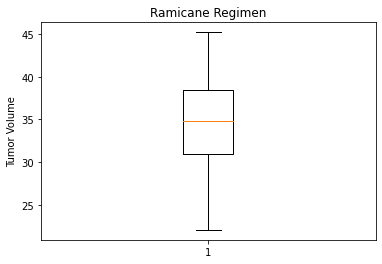

In [161]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Ramicane Regimen")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_ram)
plt.show()

In [162]:
# Calculate the final tumor volume of each mouse across Infubinol Regimen and merge it to get the tumor volume at the last timepoint.


inf_drug = last_greatest.loc[last_greatest["Drug Regimen"]=="Infubinol"]
tumor_inf = inf_drug["Tumor Volume (mm3)"]
tumor_inf.reset_index()

,index,Tumor Volume (mm3)
0,463,67.973419
1,473,65.525743
2,540,66.083066
3,637,72.226731
4,800,62.435404
5,834,60.918767
6,1053,66.196912
7,1813,67.685569
8,1872,62.754451


In [163]:
# Create quartile calculations.

quantile_inf = tumor_inf.quantile([0.25,0.5,0.75])
low_quartile_inf = quantile_inf[0.25]
high_quartile_inf = quantile_inf[0.75]
iqr_inf = high_quartile_inf - low_quartile_inf


print(low_quartile_inf)
print(high_quartile_inf)
print(iqr_inf)
print(quantile_inf[0.5])

lower_bound_inf = low_quartile_inf - (iqr_inf*1.5)
upper_bound_inf = high_quartile_inf + (iqr_inf*1.5)

print(lower_bound_inf)
print(upper_bound_inf)

62.75445141
67.68556862
4.9311172099999965
66.08306589
55.35777559500001
75.08224443499999


In [164]:
#Create DataFrame to preview each of calculations.
inf_df = pd.DataFrame({"Infubinol 1st quartile": [low_quartile_inf], "Infubinol 3rd quartile": [high_quartile_inf], 
                       "IQR Infubinol": [iqr_inf], "Median": [quantile_inf[0.5]],"Infubinol Lower Bound": [lower_bound_inf],
                      "Infubinol Upper Bound": [upper_bound_inf]})
inf_df

,Infubinol 1st quartile,Infubinol 3rd quartile,IQR Infubinol,Median,Infubinol Lower Bound,Infubinol Upper Bound
0,62.754451,67.685569,4.931117,66.083066,55.357776,75.082244


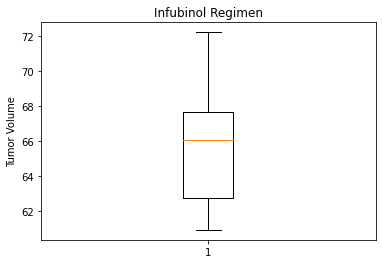

In [165]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Infubinol Regimen")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_inf)
plt.show()

In [166]:
# Calculate the final tumor volume of each mouse across Ceftamin Regimen and merge it to get the tumor volume at the last timepoint.

cef_drug = last_greatest.loc[last_greatest["Drug Regimen"]=="Ceftamin"]
tumor_cef = cef_drug["Tumor Volume (mm3)"]
tumor_cef.reset_index()

,index,Tumor Volume (mm3)
0,493,62.999356
1,993,61.849023
2,1033,68.923185
3,1112,67.748662
4,1132,59.851956
5,1162,64.299830
6,1260,59.741901
7,1379,61.433892
8,1670,67.527482
9,1773,64.634949


In [167]:
# Create quartile calculations.

quantile_cef = tumor_cef.quantile([0.25,0.5,0.75])
low_quartile_cef = quantile_cef[0.25]
high_quartile_cef = quantile_cef[0.75]
iqr_cef = high_quartile_cef - low_quartile_cef


print(low_quartile_cef)
print(high_quartile_cef)
print(iqr_cef)
print(quantile_cef[0.5])

lower_bound_cef = low_quartile_cef - (iqr_cef*1.5)
upper_bound_cef = high_quartile_cef + (iqr_cef*1.5)

print(lower_bound_cef)
print(upper_bound_cef)

61.43389223
67.52748237
6.093590140000003
64.29983003
52.29350701999999
76.66786758


In [168]:
#Create DataFrame to preview each of calculations.

cef_df = pd.DataFrame({"Ceftamin 1st quartile": [low_quartile_cef], "Ceftamin 3rd quartile": [high_quartile_cef], 
                       "IQR Ceftamin": [iqr_cef], "Median": [quantile_cef[0.5]],"Ceftamin Lower Bound": [lower_bound_cef],
                      "Ceftamin Upper Bound": [upper_bound_cef]})
cef_df

,Ceftamin 1st quartile,Ceftamin 3rd quartile,IQR Ceftamin,Median,Ceftamin Lower Bound,Ceftamin Upper Bound
0,61.433892,67.527482,6.09359,64.29983,52.293507,76.667868


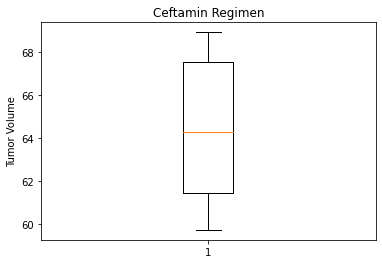

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Ceftamin Regimen")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_cef)
plt.show()

In [170]:
#Select the mouse ID from "Mouse ID" to create the line plot.
cap_mouse = sorted_.loc[sorted_["Mouse ID"]== "i557"]

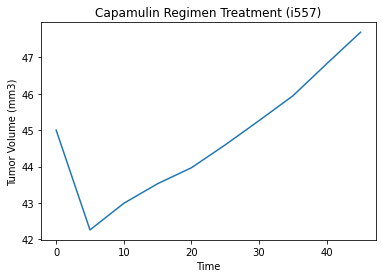

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capamulin Regimen Treatment (i557)")
plt.show()

In [172]:
#Grab the average of "Tumor Volume (mm3)" in each of "Mouse ID" from Capomulin Regimen treatment and create the DataFrame for it
average_tumor_cap = pd.DataFrame(cap_drug.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index()).rename(columns ={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_tumor_cap

,Mouse ID,Average Tumor Volume
0,s185,23.343598
1,m601,28.430964
2,x401,28.484033
3,u364,31.023923
4,y793,31.896238
5,r554,32.377357
6,m957,33.329098
7,t565,34.455298
8,w914,36.041047
9,g288,37.074024


In [173]:
#Merge the "Capomulin Regiment" with "Average of Tumor Volume" 
average_tumor_cap = pd.merge(cap_drug, average_tumor_cap, on = "Mouse ID")
average_tumor_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Average Tumor Volume
0,b128,Capomulin,Female,9,22,45,38.982878,2,38.982878
1,b742,Capomulin,Male,7,21,45,38.939633,0,38.939633
2,g288,Capomulin,Male,3,19,45,37.074024,1,37.074024
3,g316,Capomulin,Female,22,22,45,40.159220,2,40.159220
4,i557,Capomulin,Female,1,24,45,47.685963,1,47.685963
5,i738,Capomulin,Female,23,20,45,37.311846,2,37.311846
6,j119,Capomulin,Female,7,23,45,38.125164,1,38.125164
7,l509,Capomulin,Male,17,21,45,41.483008,3,41.483008
8,l897,Capomulin,Male,17,19,45,38.846876,1,38.846876
9,m601,Capomulin,Male,22,17,45,28.430964,1,28.430964


In [174]:
#Grab the Weight of mouses and Average of Tumor Volume.
final_cap_average = average_tumor_cap[["Weight (g)", "Average Tumor Volume"]]
final_cap_average

,Weight (g),Average Tumor Volume
0,22,38.982878
1,21,38.939633
2,19,37.074024
3,22,40.159220
4,24,47.685963
5,20,37.311846
6,23,38.125164
7,21,41.483008
8,19,38.846876
9,17,28.430964


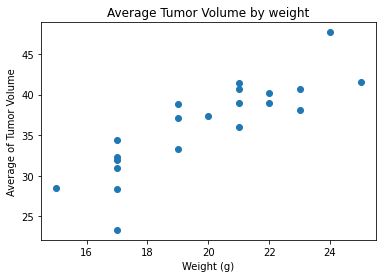

In [175]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


x = final_cap_average["Weight (g)"]
y = final_cap_average["Average Tumor Volume"]

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average of Tumor Volume")
plt.title("Average Tumor Volume by weight")
plt.show()

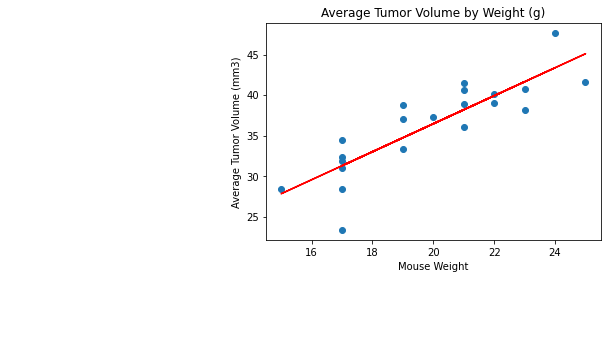

y = 1.72 x = 2.0
The correlation between weight and average tumor volume
on the Capomulin regimen is 0.85.


In [177]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


x = final_cap_average["Weight (g)"]
y = final_cap_average["Average Tumor Volume"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x = " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight (g)")
plt.show()

correlation = st.pearsonr(x,y)

print(line_eq)


print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")